In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

In [2]:
df= pd.read_csv("cleaned_numerical_data.csv")
df.head()

,selling_price,km_driven,mileage,engine,max_power,seats,no_of_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_More than 2 owner,owner_Second Owner
0,450000,145500,23.40,1248.0,74.00,5.0,8,1,0,0,1,0,1,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,8,1,0,0,1,0,1,0,1
2,158000,140000,17.70,1497.0,78.00,5.0,16,0,0,1,1,0,1,1,0
3,225000,127000,23.00,1396.0,90.00,5.0,12,1,0,0,1,0,1,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,15,0,0,1,1,0,1,0,0


In [3]:
# independent and dependent feature respectively
X= df.iloc[:,1:]
y= df.iloc[:,0]


In [4]:
X = scale.fit_transform(X)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


### Randomized Search Cv


In [7]:
#Randomized Search Cv

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

from sklearn.model_selection import RandomizedSearchCV
rf_random= RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=5,cv=5,random_state=42,n_jobs=1)

rf_random.fit(X_train,y_train)
y_pred_rscv= rf_random.predict(X_test)



{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### Random forest without Randomized Search Cv

In [8]:
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)

In [9]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
import math

def get_metrics(preds, actual, model_type):
    r2s = r2(preds, actual)
    maes = mae(preds, actual)
    mses = mse(preds, actual)
    rmses = math.sqrt(mses)
#     return rmse, mse, mae, r2

    df = pd.DataFrame([r2s, maes, mses, rmses, model_type]).transpose()
    df.columns = ['r2 coeff.', 'MAE', 'MSE', 'RMSE', 'Type of model']
    return df

df_metrics_1 = get_metrics(y_pred_rscv, y_test, 'With Randomizes search cv')
df_metrics_2 = get_metrics(y_pred_rf, y_test, 'Random Forest Regressor')
df_metrics = pd.concat([df_metrics_1, df_metrics_2], axis=0)

df_metrics

,r2 coeff.,MAE,MSE,RMSE,Type of model
0,0.91866,85515.167755,48157379014.594559,219447.895899,With Randomizes search cv
0,0.950142,72742.598337,31909403163.029007,178632.032858,Random Forest Regressor


Hence random forest without Randomized search cv gives better result comparatively.
Thus we will use y_pred_rf


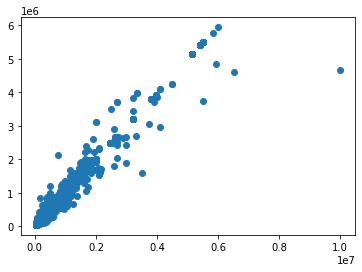

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_rf)

In [11]:
import pickle
file = open('carPricePred_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf, file)